In [24]:
#aibnb case study, importing csv data to jupyter notebook, pandas#

In [156]:
import pandas as pd
import numpy as np
import plotly.express as px
!pip install folium
import matplotlib.image as mpimg
import folium
%matplotlib inline
import seaborn as sns
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
from folium import plugins

In [26]:
df = pd.read_csv('/Users/Ramonpoopy/Desktop/Repos/mini-curso-ds/archive/AB_NYC_2019.csv') #df = dataframe#

In [28]:
""" cleaning the date, nan empty cells
"""
cols = ['host_name','price']
df.loc[:,cols]
df1=df.loc[:,cols]
df1 = df.dropna()

In [31]:
# importing the df1 after clean to use in excel or tools as powerbi and tableau
df1.to_csv('df1.csv')

In [48]:
df1

id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0             John            Brooklyn       Kensington  40.64749  -73.97237   
1         Jennifer           Manhattan          Midtown  40.75362  -73.98377   
3      LisaRoxanne            Brooklyn     Clinton Hill  40.68514  -73.95976   
4            Laura           Manhattan      East Harlem  40.79851  -73.94399   
5            Chris           Manhattan      Murray Hill  40.74767  -73.97500   
...            ...                 ...              ...       ...        ...   
48782        Rusaa           Manhattan  Upper East Side  40.78099  -73.95366   
48790         H Ai              Queens         Flushing  40.75104  -73.81459   
48799          Ben       Staten Island      Great Kills  40.54179  -74.14275   
48805       Blaine               Bronx       Mott Haven  40.80787  -73.92400   
48852    Christine            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
5      Entire home/apt    200               3                 74  2019-06-22   
...                ...    ...             ...                ...         ...   
48782     Private room    129               1                  1  2019-07-07   
48790     Private room     45               1                  1  2019-07-07   
48799     Private room    235               1                  1  2019-07-07   
48805  Entire home/apt    100               1                  2  2019-07-07   
48852     Private room     30               1                  1  2019-07-08   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
3                   4.64                               1               194  
4                   0.10                               1                 0  
5                   0.59                               1               129  
...                  ...                             ...               ...  
48782               1.00                               1               147  
48790               1.00                               6               339  
48799               1.00                               1                87  
48805               2.00                               1                40  
48852               1.00                               1                 1  

[38821 rows x 16 columns]

In [53]:
# 1 - number of apt registered

df1.loc[:,'id'].nunique()

38821

In [95]:
manhattan_df = df1[df1['neighbourhood_group'] == 'Manhattan']
nunique_neighbourhoods = manhattan_df['neighbourhood'].nunique()
nunique_neighbourhoods

32

In [57]:
# 2 - metric number of unique hosts
df1.loc[:,'host_id'].nunique()

30232

In [70]:
# 3 - avg price of rent in NYC

mean = round(df1['price'].mean(), 2)
std = round(df1['price'].std(), 2)


196.99

In [11]:
# 4 avg metrics number minimum of nights

md=df1.loc[:,'minimum_nights']
np.mean(md)

5.869220267381056

In [54]:
# - - what's the maximal value of the rent#


maxrent=df1.loc[:,'price']
np.max(maxrent)

10000

In [55]:
#Q2 - how many regions have in NYC

cols=['neighbourhood_group']
quartiers = df1.loc[:,cols]
np.unique(quartiers)
q2=np.unique(quartiers)
print('The number of quartiers in NYC is' + ' ' + str(len(q2)) )

The number of quartiers in NYC is 5


In [64]:
#  5 different categories of room type
#question 4 of CEO
md=df1.groupby('room_type')['id'].count()
md

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: id, dtype: int64

In [65]:
#how many and who are the users

nm=md=df1.loc[:,'host_id']
np.unique(nm)
len(np.unique(nm))

30232

In [14]:
#Desvio padrao

pc=df1.loc[:,'price']
mean=np.mean(pc)
std=np.std(pc)
print(mean)
print(std)

142.33252621004095
196.9922186830291


[Text(0, 0, '1475015'),
 Text(1, 0, '2119276'),
 Text(2, 0, '7503643'),
 Text(3, 0, '16098958'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '120762452'),
 Text(7, 0, '137358866'),
 Text(8, 0, '190921808'),
 Text(9, 0, '219517861')]

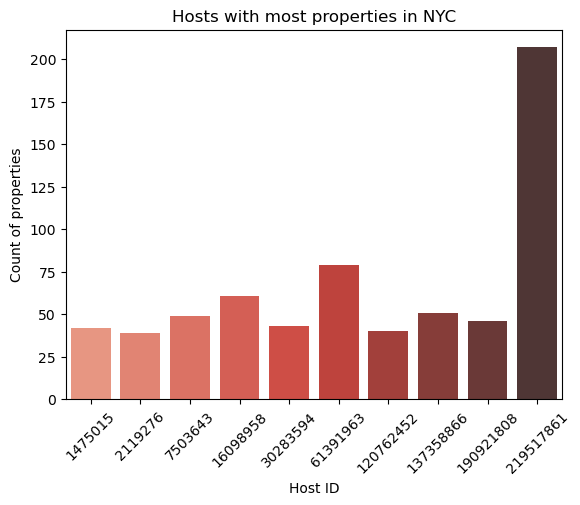

In [83]:
# top hosts

top_host = df1.host_id.value_counts().head(10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'Properties'}, inplace=True)
fig1=sns.barplot(x="Host_ID", y="Properties", data=top_host_df,
                 palette='Reds_d')
fig1.set_title('Hosts with most properties in NYC')
fig1.set_ylabel('Count of properties')
fig1.set_xlabel('Host ID')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45)

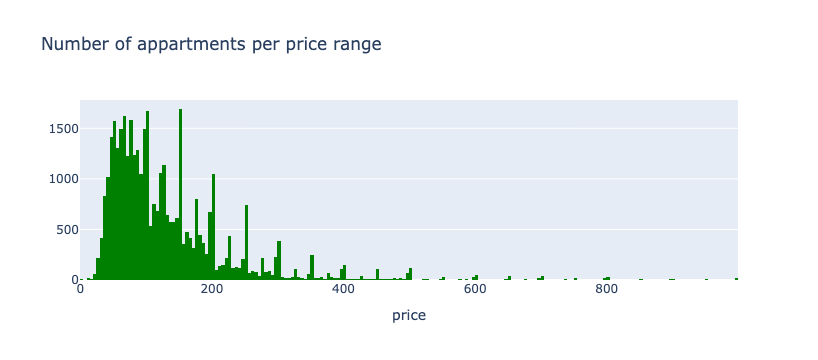

In [16]:
#histogram price range

px.histogram(df1.loc[df1['price']<1000,:],'price',nbins=300,histnorm='',labels={'Number of appartments':'Price'},title='Number of appartments per price range',color_discrete_sequence=['green'])


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

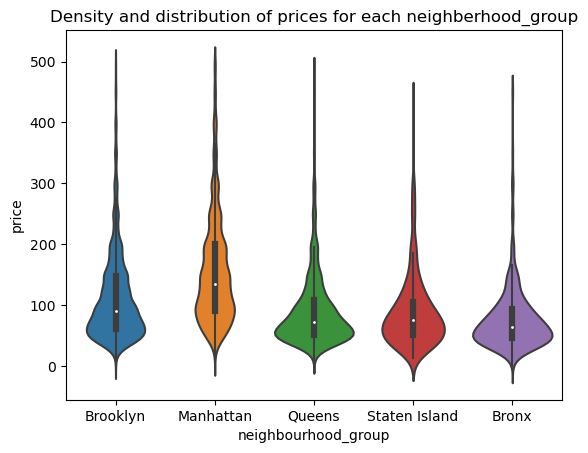

In [87]:
df2=df1[df1.price < 500]

viz_2=sns.violinplot(data=df2, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

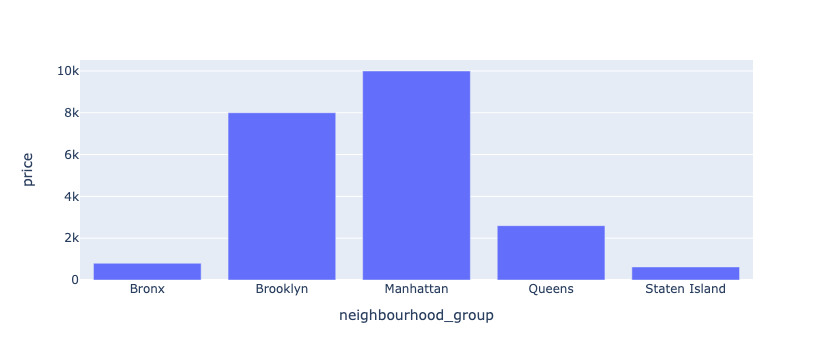

In [90]:
#what is the highest rent rate in every region of NYC?

#selecionar as colunas de interesse, bairro e preco

cols=['neighbourhood_group','price','latitude','longitude']
dataplt=df1.loc[df1['availability_365']>0,cols].groupby('neighbourhood_group').max().reset_index()
px.bar(dataplt, 'neighbourhood_group','price')

In [18]:
dataplt
type(dataplt)

pandas.core.frame.DataFrame

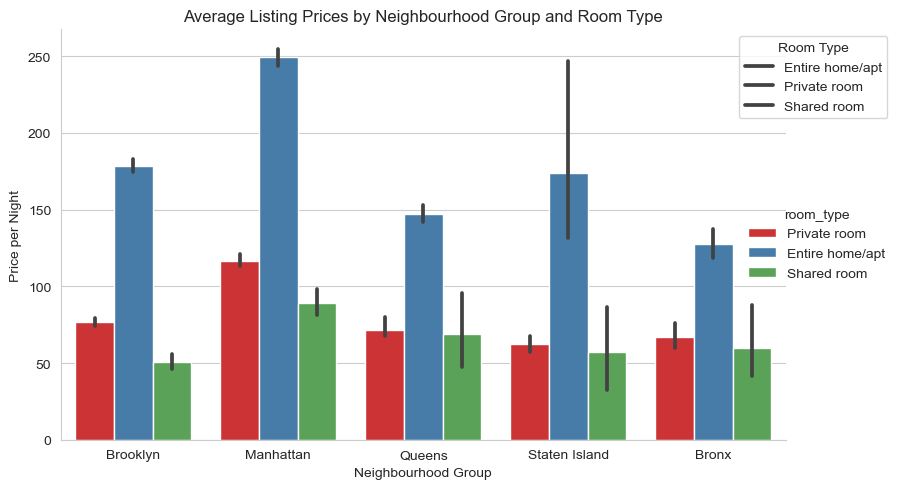

In [115]:
sns.set_style('whitegrid')   # Set the style to whitegrid for a cleaner look
sns.set_palette('Set1')      # Choose a color palette that works well with the data

# Create the bar plot
g = sns.catplot(x='neighbourhood_group', y='price', hue='room_type', kind='bar', data=df, height=5, aspect=1.5)

# Extract the axes object
ax = g.ax

# Customize the plot
ax.set_xlabel('Neighbourhood Group')  # Set the x-axis label
ax.set_ylabel('Price per Night')  # Set the y-axis label
ax.set_title('Average Listing Prices by Neighbourhood Group and Room Type')  # Set the title
ax.legend(title='Room Type', loc='upper right', labels=['Entire home/apt', 'Private room', 'Shared room'], bbox_to_anchor=(1.15, 1)) # Adjust the legend position
plt.tight_layout()  # Adjust the layout to prevent overlapping text

# Show the plot
plt.show()

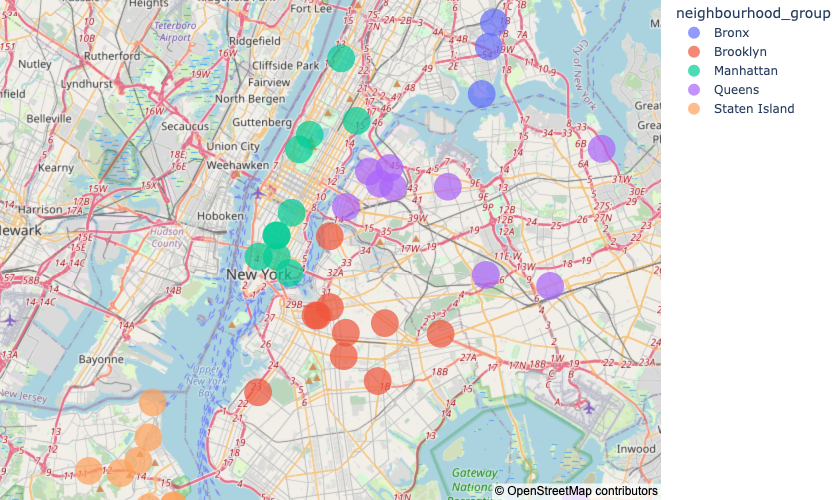

In [140]:
import plotly.express as px

# Group the data by neighborhood group and find the top 10 apartments with highest price for each group
top_10 = (df1.groupby('neighbourhood_group').apply(lambda x: x.nlargest(10, 'price')))
# Reset the index to remove the multi-level grouping
top_10 = top_10.reset_index(drop=True)

# Create a scatter mapbox plot with markers for the top 10 apartments in each neighborhood group
fig = px.scatter_mapbox(top_10, lat="latitude", lon="longitude", hover_name="neighbourhood_group", hover_data=["price"],
                        color="neighbourhood_group", zoom=10, height=500, size=[1]*len(top_10))

# Customize the map layout
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()


In [20]:
#adicionando uma nova coluna ao dataframe
cols=['neighbourhood_group','room_type','latitude','longitude']
dataplt=df1.loc[:,cols].sample(100)
dataplt.loc[:,'color']='NA'
dataplt

neighbourhood_group        room_type  latitude  longitude color
1848            Manhattan     Private room  40.75284  -74.00138    NA
34197            Brooklyn     Private room  40.64188  -73.95317    NA
43614            Brooklyn     Private room  40.71839  -73.94621    NA
41692            Brooklyn  Entire home/apt  40.68461  -73.95203    NA
45123            Brooklyn  Entire home/apt  40.71595  -73.96467    NA
...                   ...              ...       ...        ...   ...
4074             Brooklyn  Entire home/apt  40.67648  -73.95098    NA
2295            Manhattan  Entire home/apt  40.73708  -73.98455    NA
16923            Brooklyn  Entire home/apt  40.69887  -73.93564    NA
47224           Manhattan  Entire home/apt  40.80491  -73.96339    NA
22888            Brooklyn  Entire home/apt  40.60402  -73.95257    NA

[100 rows x 5 columns]

In [21]:
#how to do it with for or if*
dataplt.loc[dataplt['room_type']=='Private room','color']='darkgreen'
dataplt.loc[dataplt['room_type']=='Entire home/apt','color']='blue'
dataplt.loc[dataplt['room_type']=='Shared room','color']='red'
dataplt

neighbourhood_group        room_type  latitude  longitude      color
1848            Manhattan     Private room  40.75284  -74.00138  darkgreen
34197            Brooklyn     Private room  40.64188  -73.95317  darkgreen
43614            Brooklyn     Private room  40.71839  -73.94621  darkgreen
41692            Brooklyn  Entire home/apt  40.68461  -73.95203       blue
45123            Brooklyn  Entire home/apt  40.71595  -73.96467       blue
...                   ...              ...       ...        ...        ...
4074             Brooklyn  Entire home/apt  40.67648  -73.95098       blue
2295            Manhattan  Entire home/apt  40.73708  -73.98455       blue
16923            Brooklyn  Entire home/apt  40.69887  -73.93564       blue
47224           Manhattan  Entire home/apt  40.80491  -73.96339       blue
22888            Brooklyn  Entire home/apt  40.60402  -73.95257       blue

[100 rows x 5 columns]

In [148]:
def create_pie_chart_icon(row):
    chart = AltairChart(data=row, chart_type='pie_chart')
    icon = folium.features.CustomIcon(chart, icon_size=(30, 30))

    df_avg = df1.groupby(['neighbourhood_group', 'room_type']).agg({'price': 'mean', 'id': 'count'}).reset_index()

# Define a color map for each room type
colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'red'
}

# Create a map
map = folium.Map(location=[40.73, -73.98], zoom_start=10)

# Create a MarkerCluster layer for each neighborhood group
for neighborhood_group in df_avg['neighbourhood_group'].unique():

    # Filter the data for the current neighborhood group
    df_ng = df_avg[df_avg['neighbourhood_group'] == neighborhood_group]

    # Add a MarkerCluster layer for the current neighborhood group
    marker_cluster = MarkerCluster(name=neighborhood_group)
    map.add_child(marker_cluster)

    # Add markers with pie charts for each room type
    for index, row in df_ng.iterrows():
        folium.Marker(
            location=[df.loc[df['neighbourhood_group'] == neighborhood_group, 'latitude'].mean(), df.loc[df['neighbourhood_group'] == neighborhood_group, 'longitude'].mean()],
            icon=folium.Icon(color=colors[row['room_type']]),
            popup='<b>{}</b><br>Room type: {}<br>Avg price: ${:,.0f}<br>Count: {:,.0f}'.format(
                neighborhood_group, row['room_type'], row['price'], row['id']),
            tooltip=row['room_type']
        ).add_to(marker_cluster)

# Add a layer control to the map
folium.LayerControl().add_to(map)

# Show the map
map

In [24]:
df.head(20)

id                                              name  host_id  \
0   2539                Clean & quiet apt home by the park     2787   
1   2595                             Skylit Midtown Castle     2845   
2   3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3   3831                   Cozy Entire Floor of Brownstone     4869   
4   5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5   5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6   5121                                   BlissArtsSpace!     7356   
7   5178                  Large Furnished Room Near B'way      8967   
8   5203                Cozy Clean Guest Room - Family Apt     7490   
9   5238                Cute & Cozy Lower East Side 1 bdrm     7549   
10  5295                  Beautiful 1br on Upper West Side     7702   
11  5441                   Central Manhattan/near Broadway     7989   
12  5803    Lovely Room 1, Garden, Best Area, Legal rental     9744   
13  6021  Wonderful Guest Bedroom in Manhattan for SINGLES    11528   
14  6090                     West Village Nest - Superhost    11975   
15  6848                  Only 2 stops to Manhattan studio    15991   
16  7097                 Perfect for Your Parents + Garden    17571   
17  7322                                   Chelsea Perfect    18946   
18  7726   Hip Historic Brownstone Apartment with Backyard    20950   
19  7750                 Huge 2 BR Upper East  Cental Park    17985   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
5              Chris           Manhattan         Murray Hill  40.74767   
6              Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
7           Shunichi           Manhattan      Hell's Kitchen  40.76489   
8          MaryEllen           Manhattan     Upper West Side  40.80178   
9                Ben           Manhattan           Chinatown  40.71344   
10              Lena           Manhattan     Upper West Side  40.80316   
11              Kate           Manhattan      Hell's Kitchen  40.76076   
12            Laurie            Brooklyn         South Slope  40.66829   
13           Claudio           Manhattan     Upper West Side  40.79826   
14             Alina           Manhattan        West Village  40.73530   
15     Allen & Irina            Brooklyn        Williamsburg  40.70837   
16              Jane            Brooklyn         Fort Greene  40.69169   
17              Doti           Manhattan             Chelsea  40.74192   
18  Adam And Charity            Brooklyn       Crown Heights  40.67592   
19              Sing           Manhattan         East Harlem  40.79685   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -73.97237     Private room    149               1                  9   
1   -73.98377  Entire home/apt    225               1                 45   
2   -73.94190     Private room    150               3                  0   
3   -73.95976  Entire home/apt     89               1                270   
4   -73.94399  Entire home/apt     80              10                  9   
5   -73.97500  Entire home/apt    200               3                 74   
6   -73.95596     Private room     60              45                 49   
7   -73.98493     Private room     79               2                430   
8   -73.96723     Private room     79               2                118   
9   -73.99037  Entire home/apt    150               1                160   
10  -73.96545  Entire home/apt    135               5                 53   
11  -73.98867     Private room     85          

In [ ]:
colors = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'red'
}

# Create a map
map = folium.Map(location=[40.73, -73.98], zoom_start=10)

# Create a MarkerCluster layer for each neighborhood group
for neighborhood_group in df1['neighbourhood_group'].unique():

    # Filter the data for the current neighborhood group
    df_ng = df1[df1['neighbourhood_group'] == neighborhood_group]

    # Add a MarkerCluster layer for the current neighborhood group
    marker_cluster = MarkerCluster(name=neighborhood_group)
    map.add_child(marker_cluster)

    # Add markers with pie charts for each room type
    for index, row in df_ng.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            icon=folium.Icon(color=colors[row['room_type']]),
            popup='<b>{}</b><br>Room type: {}<br>Avg price: ${:,.0f}<br>Count: {:,.0f}'.format(
                neighborhood_group, row['room_type'], row['price'], row['id']),
            tooltip='Neighborhood group: {}'.format(neighborhood_group)
        ).add_to(marker_cluster)

# Add a layer control to the map
folium.LayerControl().add_to(map)

# Show the map
map